## Packages Import

In [1]:
import pandas as pd
import numpy as np
import nltk
#nltk.download('wordnet')

## Dataset Import

In [2]:
all_data = pd.read_csv('tweets.csv', sep=';')

/Users/pedro/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3146: DtypeWarning: Columns (0,1,2,3,4,8) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


## Reducing Dataset Size

### Droping non Interesting Columns

In [3]:
all_data.drop(columns = ['id', 'user', 'fullname', 'url'], inplace=True)

In [4]:
all_data.shape

(20165013, 5)

In [5]:
all_data = all_data.sort_values(by='timestamp').reset_index()

### Droping Nan rows

In [14]:
all_data = all_data.dropna(axis=0, how='any')

In [17]:
all_data.drop(columns=['index'], inplace=True)

In [18]:
all_data.head()

,timestamp,replies,likes,retweets,text
0,2007-04-19 07:14:38+00,0.0,0.0,2.0,is happily mugging at BTC where she will hook ...
1,2009-01-11 03:33:52+00,790.0,14470.0,5542.0,Running bitcoin
2,2009-01-21 17:29:40+00,55.0,1544.0,392.0,Looking at ways to add more anonymity to bitcoin
3,2009-01-27 20:14:10+00,44.0,1042.0,277.0,Thinking about how to reduce CO2 emissions fro...
4,2009-01-29 13:37:53+00,0.0,28.0,16.0,From: Satoshi Nakamoto - 2009-01-11 22:32 Bitc...


In [19]:
all_data['timestamp']

0           2007-04-19 07:14:38+00
1           2009-01-11 03:33:52+00
2           2009-01-21 17:29:40+00
3           2009-01-27 20:14:10+00
4           2009-01-29 13:37:53+00
5           2009-02-18 05:57:24+00
6           2009-06-09 11:47:02+00
7           2009-06-19 20:07:37+00
8           2009-06-19 21:19:07+00
9           2009-06-19 23:40:39+00
10          2009-06-20 14:32:53+00
11          2009-09-24 04:02:39+00
12          2009-12-04 10:52:37+00
13          2009-12-13 06:48:05+00
14          2009-12-13 06:48:05+00
15          2010-03-11 05:24:12+00
16          2010-04-30 20:06:15+00
17          2010-06-19 23:36:46+00
18          2010-07-19 15:01:48+00
19          2010-07-20 15:58:28+00
20          2010-07-20 23:16:08+00
21          2010-07-21 21:46:59+00
22          2010-08-14 13:34:50+00
23          2010-08-16 07:28:45+00
24          2010-08-21 16:05:58+00
25          2010-10-22 01:13:55+00
26          2010-10-31 16:19:09+00
27          2010-11-06 13:28:46+00
28          2010-11-

### Droping rows out of interest timeline

#### Transforming Date values in datetime format

In [21]:
all_data["Date"]=list(map(lambda x: pd.to_datetime(x[:10], format='%Y/%m/%d'), all_data["timestamp"]))
all_data.drop(columns=['timestamp'], inplace=True)
all_data.head()

,replies,likes,retweets,text,Date
0,0.0,0.0,2.0,is happily mugging at BTC where she will hook ...,2007-04-19
1,790.0,14470.0,5542.0,Running bitcoin,2009-01-11
2,55.0,1544.0,392.0,Looking at ways to add more anonymity to bitcoin,2009-01-21
3,44.0,1042.0,277.0,Thinking about how to reduce CO2 emissions fro...,2009-01-27
4,0.0,28.0,16.0,From: Satoshi Nakamoto - 2009-01-11 22:32 Bitc...,2009-01-29


#### Slicing dataset to match Bitcoin timeline:	2014-09-17  to 2020-11-18

In [22]:
start_date = pd.to_datetime('2014-09-17', utc=None)
end_date = pd.to_datetime('2020-11-18', utc=None)
df = all_data[np.logical_and(all_data["Date"] >= start_date, all_data["Date"] <= end_date)].copy()

In [23]:
df.head()

,replies,likes,retweets,text,Date
356277,0.0,0.0,0.0,1 #bitcoin = $6093.54 MXN | $462.81 USD #BitAP...,2014-09-17
356278,0.0,0.0,0.0,2014年9月17日 11:00:02\nBTC_MONA\n買[bid]:4116.000...,2014-09-17
356279,0.0,0.0,1.0,#RDD / #BTC on the exchanges:\nCryptsy: 0.0000...,2014-09-17
356280,0.0,0.0,0.0,Current price: 463.71$ $BTCUSD $btc #bitcoin 2...,2014-09-17
356281,0.0,0.0,0.0,One Bitcoin now worth $463.50@bitstamp. High $...,2014-09-17


In [24]:
df.shape

(18453523, 5)

## Data Cleaning

### Removing emojis

In [25]:
import re
#remove emojis 
def remove_emoji(string):
    emoji_pattern = re.compile("["
                            u"\U0001F600-\U0001F64F"  # emoticons
                            u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                            u"\U0001F680-\U0001F6FF"  # transport & map symbols
                            u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                            u"\U00002702-\U000027B0"
                            u"\U000024C2-\U0001F251"
                            u"\U0001f926-\U0001f937"
                            u'\U00010000-\U0010ffff'
                            u"\u200d"
                            u"\u2640-\u2642"
                            u"\u2600-\u2B55"
                            u"\u23cf"
                            u"\u23e9"
                            u"\u231a"
                            u"\u3030"
                            u"\ufe0f"
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', string)
df['text']=df['text'].astype(str)
df['text']=df['text'].map(remove_emoji)

### Removing URLs

In [26]:
#removing URLS
def remove_urls(text):
    url_pattern = re.compile(r'https?://\S+|www\.\S+')
    return url_pattern.sub(r'', text)
df['text'] = df['text'].map(remove_urls)

### Removing Punctuation

In [27]:
#removing punctuation
import string 
string.punctuation
def remove_punc(text):
    for punctuation in string.punctuation:
        text = text.replace(punctuation, '')
    return text
df['text'] = df['text'].map(remove_punc)

### Lowercase Text

In [28]:
#making lowercase 
def lowercase(text):
    text = text.lower()
    return text
df['text'] = df['text'].map(lowercase)

### Removing Stop Words

In [29]:
#remove stopwords
from nltk.corpus import stopwords
", ".join(stopwords.words('english'))
STOPWORDS = set(stopwords.words('english'))
def remove_stopwords(text):
    return " ".join([word for word in str(text).split() if word not in STOPWORDS])
df['text'] = df['text'].map(remove_stopwords)

In [30]:
#remove html
def remove_html(text):
    html_pattern = re.compile('<.*?>')
    return html_pattern.sub(r'', text)
df['text'] = df['text'].map(remove_html)

In [31]:
#remove non-english characters
def remove_non_ascii(text):
    return ''.join(i for i in text if ord(i)<128) 
df['text'] = df['text'].apply(remove_non_ascii) 

In [32]:
#removing blank columns
df['text'] = (df['text'].replace(r'^\s*$', np.nan, regex=True))
df['text'].isnull().sum()
df['text'].dropna(inplace = True)

In [ ]:
#detecting language
from langdetect import detect
def detect_language(text):
    try:
        lang = detect(text)
    except:
        lang = 'unknown'
    return lang
df["lang"] = df['text'].map(detect_language)

In [ ]:
df['lang'].unique()

In [ ]:
en_df = df.loc[df['lang'] == 'en'].copy()

In [ ]:
en_df.head()

In [ ]:
#lemmatize 
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
stop_words = set(stopwords.words('english'))
def clean_text(text):
    text = ''.join(word for word in text if not word.isdigit())
    text = ' '.join(token.lower() for token in word_tokenize(text) if token.lower() not in stop_words)
    lemmatizer = WordNetLemmatizer()
    text = ''.join(lemmatizer.lemmatize(word) for word in text)
    return text
en_df['text'] = en_df['text'].map(clean_text)

In [ ]:
#pip install -U textblob
#python -m textblob.download_corpora
from textblob import TextBlob
#nltk.download('averaged_perceptron_tagger')
#en_df['text'] = en_df['text'].astype(str)

def sentimenter(text):
    blob = TextBlob(text)
    blob.tags
    blob.noun_phrases
    for sentence in blob.sentences:
        return(sentence.sentiment.polarity)
    
en_df['sentiment'] = en_df['text'].map(sentimenter)
#sentiment.head(5)

In [ ]:
en_df.head()

In [ ]:
btc_tweets_sentiment = en_df.groupby(by=['Date']).mean()

In [ ]:
btc_tweets_sentiment.to_csv('all_btc_tweets_sentiment.csv')

In [ ]:
btc_tweets_sentiment.plot(figsize=(12,10))

## Joining BTC price data to compare

In [35]:
btc_price = pd.read_csv('../price_data/BTC-USD.csv')
btc_price.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800
1,2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200
2,2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700
3,2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600
4,2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100


In [38]:
btc_price["Date"]=list(map(lambda x: pd.to_datetime(x, format='%Y/%m/%d'), btc_price["Date"]))
btc_price.Date

0      2014-09-17
1      2014-09-18
2      2014-09-19
3      2014-09-20
4      2014-09-21
5      2014-09-22
6      2014-09-23
7      2014-09-24
8      2014-09-25
9      2014-09-26
10     2014-09-27
11     2014-09-28
12     2014-09-29
13     2014-09-30
14     2014-10-01
15     2014-10-02
16     2014-10-03
17     2014-10-04
18     2014-10-05
19     2014-10-06
20     2014-10-07
21     2014-10-08
22     2014-10-09
23     2014-10-10
24     2014-10-11
25     2014-10-12
26     2014-10-13
27     2014-10-14
28     2014-10-15
29     2014-10-16
          ...    
2221   2020-10-16
2222   2020-10-17
2223   2020-10-18
2224   2020-10-19
2225   2020-10-20
2226   2020-10-21
2227   2020-10-22
2228   2020-10-23
2229   2020-10-24
2230   2020-10-25
2231   2020-10-26
2232   2020-10-27
2233   2020-10-28
2234   2020-10-29
2235   2020-10-30
2236   2020-10-31
2237   2020-11-01
2238   2020-11-02
2239   2020-11-03
2240   2020-11-04
2241   2020-11-05
2242   2020-11-06
2243   2020-11-07
2244   2020-11-08
2245   202

In [39]:
compare_df = btc_price.merge(en_df, on='Date')
compare_df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,replies,likes,retweets,text,lang,sentiment
0,2019-01-01,3746.713379,3850.913818,3707.231201,3843.520020,3843.520020,4324200990,1,50,195,followrt vipstarcoin vips vips bitcoin xrp fau...,en,0.0
1,2019-01-01,3746.713379,3850.913818,3707.231201,3843.520020,3843.520020,4324200990,0,0,0,top cryptocurrencies alert time bitcoin xrp et...,en,0.5
2,2019-01-01,3746.713379,3850.913818,3707.231201,3843.520020,3843.520020,4324200990,0,4,0,send btc,en,0.0
3,2019-01-02,3849.216309,3947.981201,3817.409424,3943.409424,3943.409424,5244856835,9,56,36,bcpeth trading pair available etherflyer utc b...,en,0.4
4,2019-01-02,3849.216309,3947.981201,3817.409424,3943.409424,3943.409424,5244856835,0,0,0,top cryptocurrencies alert time bitcoin ethere...,en,0.5


In [42]:
#compare_df = compare_df.set_index('Date')
compare_df.head()

,Open,High,Low,Close,Adj Close,Volume,replies,likes,retweets,text,lang,sentiment
Date,,,,,,,,,,,,
2019-01-01,3746.713379,3850.913818,3707.231201,3843.520020,3843.520020,4324200990,1,50,195,followrt vipstarcoin vips vips bitcoin xrp fau...,en,0.0
2019-01-01,3746.713379,3850.913818,3707.231201,3843.520020,3843.520020,4324200990,0,0,0,top cryptocurrencies alert time bitcoin xrp et...,en,0.5
2019-01-01,3746.713379,3850.913818,3707.231201,3843.520020,3843.520020,4324200990,0,4,0,send btc,en,0.0
2019-01-02,3849.216309,3947.981201,3817.409424,3943.409424,3943.409424,5244856835,9,56,36,bcpeth trading pair available etherflyer utc b...,en,0.4
2019-01-02,3849.216309,3947.981201,3817.409424,3943.409424,3943.409424,5244856835,0,0,0,top cryptocurrencies alert time bitcoin ethere...,en,0.5


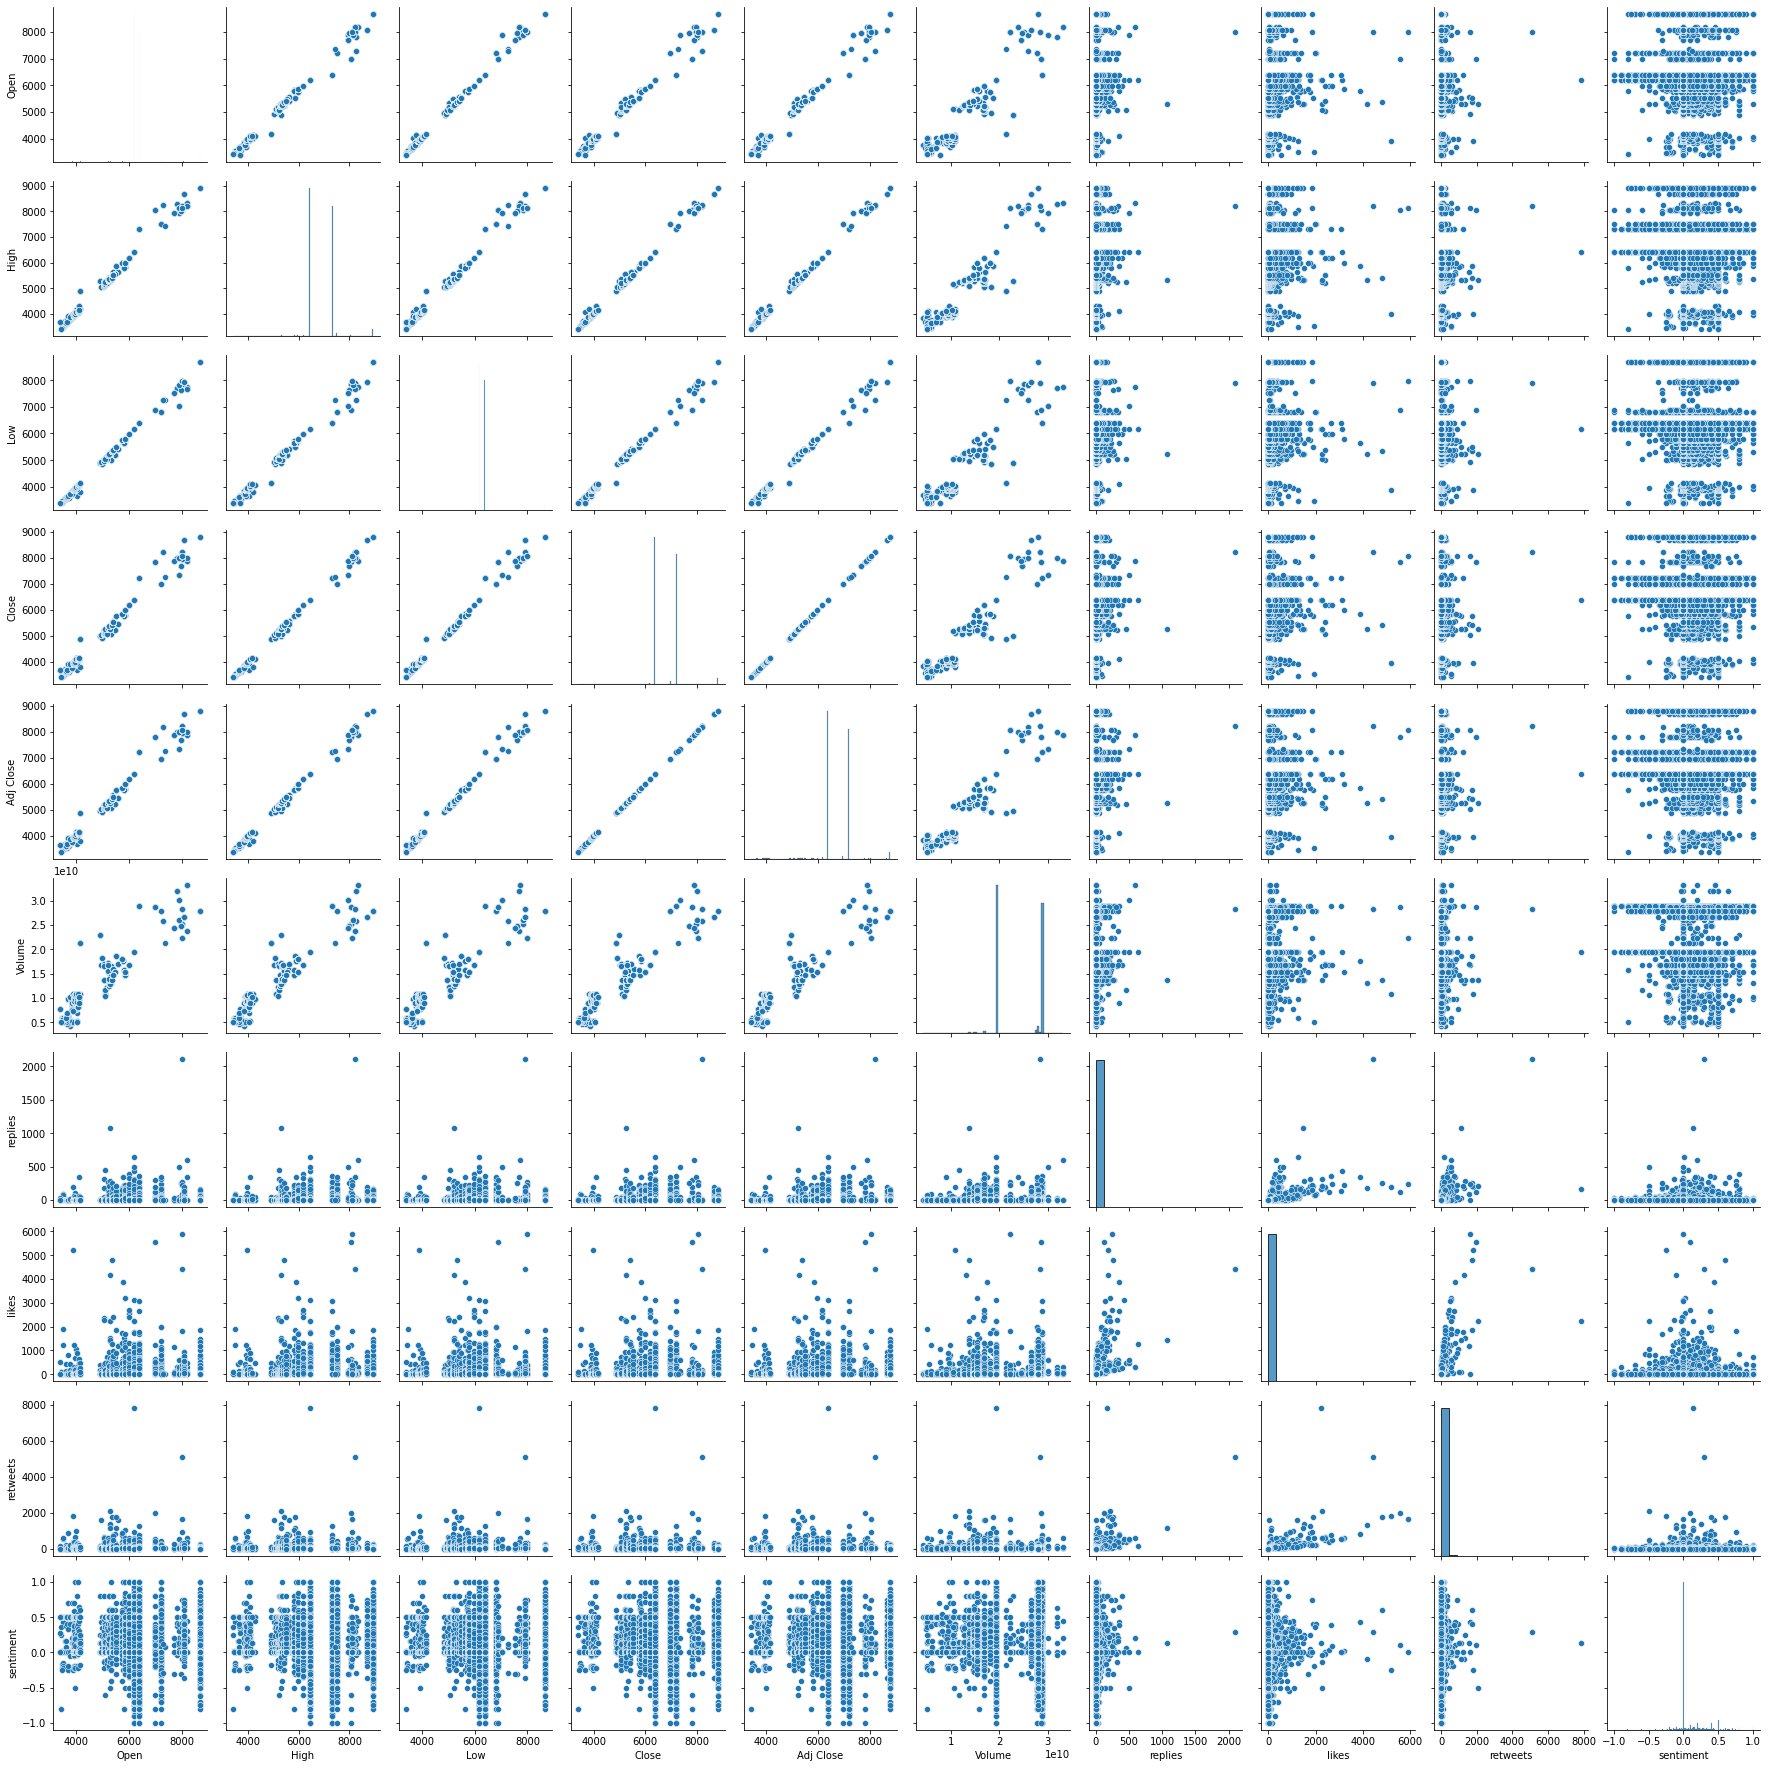

In [43]:
import seaborn as sns
sns.pairplot(compare_df)